In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import ugradio as ug 


In [2]:
import numpy as np

def _compute_dft(in_x,in_y,out_x,inverse=False):
    if not inverse:
        in_y = np.fft.fftshift(in_y) 
        j = -1j
    else:
        in_y = np.array([i*(1.0/len(in_x)) for i in in_y])
        j = 1j

    N = len(in_x)
    out_y = np.zeros(len(out_x),dtype=np.complex128)
    for k,f in enumerate(out_x):
        out_y[k] = np.sum(in_y*np.exp(2*j*np.pi*f*in_x))

    return out_y
            
def dft(xt,t=[],f=[],vsamp=12.5e6):
    """
    Input 
    -----
    xt    : complex array, input time domain signal
    t     : (opt.) real array, input sample times. 
    f     : (opt.) real array, output sample frequencies
    vsamp : (opt.) float, sampling frequency
            default: 1
    Output
    ------
    Fx    : The discrete fourier transform of the input array

    """
    N = len(xt)
    if (len(t)):
        assert(len(t) == N), "Samples and sample times do not match!"
    else:
        t = np.linspace(-N/(2.0*vsamp),N/(2.0*vsamp),num=N,endpoint=False)

    if not (len(f)):
        vsamp = N/float(np.ceil(t.max() - t.min()))
        f = np.linspace(-vsamp/2.,vsamp/2.,num=N,endpoint=False)
    
    Fx = _compute_dft(t,xt,f)

    return f,Fx

def idft(Fx,f=[],t=[],vsamp=12.5e6):
    """
    Input
    -----
    Fx    : complex array, input frequency domain signal
    f     : (opt.) real array, input sample frequencies
    t     : (opt.) real array, output sample times
    
    Output
    ------
    xt: The time domain signal of the input array

    """
    N = len(Fx)
    if (len(f)):
        assert(len(f) == N), "Samples and sample frequencies do not match!"
    else:
        f = np.linspace(-vsamp/2.,vsamp/2.,num=N,endpoint=False)

    if not (len(t)):
        T = N/float(np.ceil(f.max()) - f.min())
        t = np.linspace(-T/2.0,T/2.0,num=N,endpoint=False)
    
    xt = _compute_dft(f,Fx,t,inverse=True)

    return t,xt



In [3]:
ARR = []
for i in range(1,10):
    name = "lab1" + '_%s' % i + '0p_1' + '.npy' 
    ARR.append(np.load(name))
   


In [4]:
##NYQUIST CRITERION 

In [39]:
def digital_sampling_normalize(N):
    v_samp=12.5
    t = np.linspace(0,N,N)
    for i in range(1,10):
        plt.figure(figsize=(20,20))
        lit = 910 + i
        plt.subplot(lit)
        plt.plot(t,ARR[i-1][50:N+50]/(2**13),'b.-')
        plt.xlabel("Time in $\mu$s", fontsize= 20)
        plt.ylabel("Voltages", fontsize = 20)
        plt.title(str(i) + '0% of Sampling frequency of 12.5MHz')
        plt.grid(True)
        plt.show()

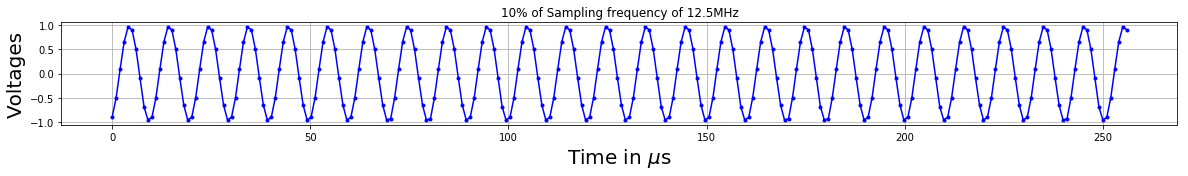

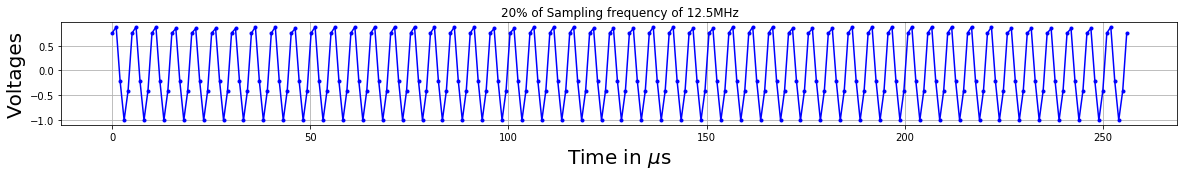

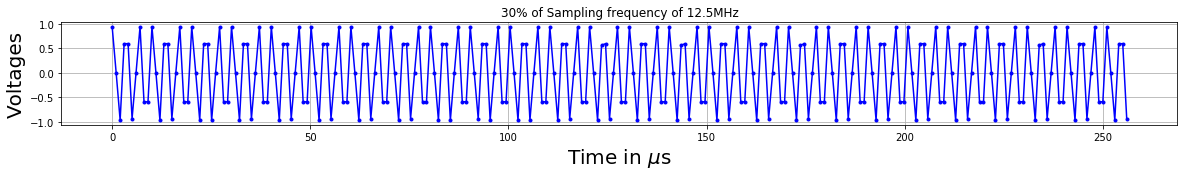

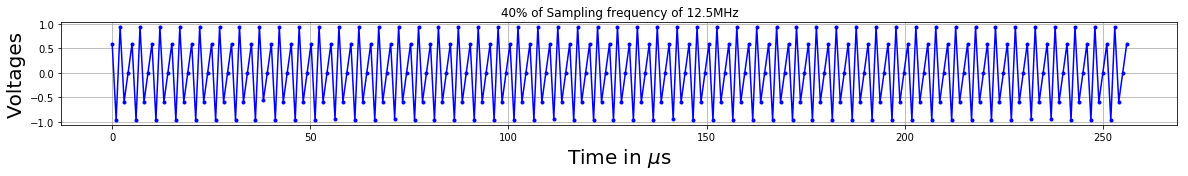

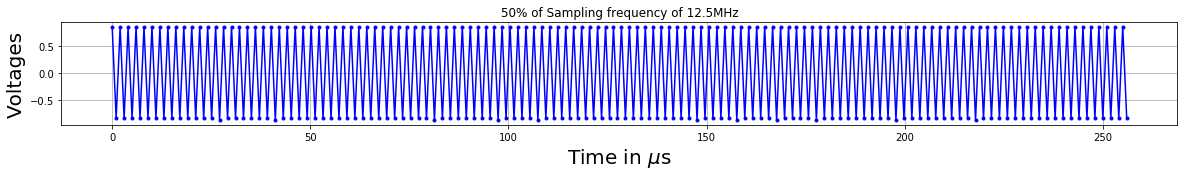

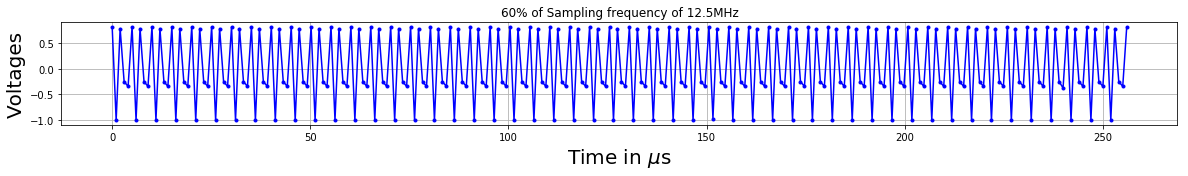

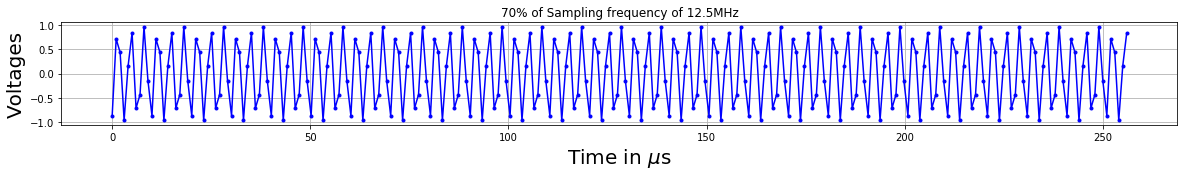

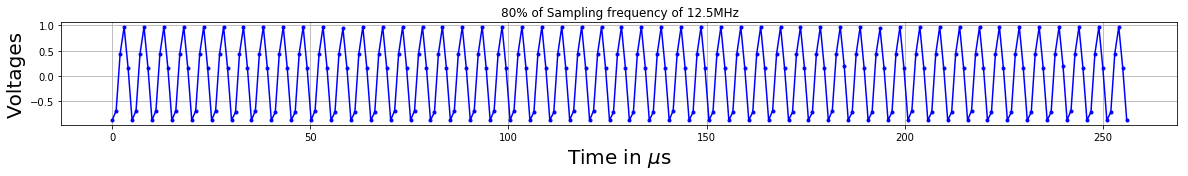

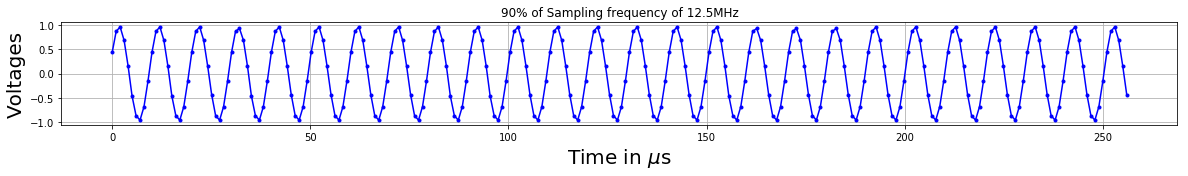

In [40]:
digital_sampling_normalize(2**8 )   

In [7]:
##VOLTAGE SPECTRUM 

In [8]:
def voltage_spectrum(N):
   
    v_samp = 12.5e6
    t = np.linspace(-N/(2*v_samp),((N/2)-1)/v_samp,N) #time sample domain signal 
    f = np.linspace(-v_samp/2,(1-2/N)*(v_samp/2),N)  #output sample frequency domain 
    REAL = []
    IMAG = []
    for i in range(1,10):
        F = dft(ARR[i-1][50:N+50]/2**13,t,f,vsamp=12.5e6)
        real = []
        imag = []
        REAL.append(real)
        IMAG.append(imag)
        for num in F[1]:
            real.append(num.real)
            imag.append(num.imag)
    return REAL, IMAG
        



In [9]:
def get_VS_plots(N):
    v_samp = 12.5e6
    f = np.linspace(-v_samp/2,(1-2/N)*(v_samp/2),N)
    for i in range(1,10):
  
        plt.figure(figsize=(20,20))
        yee = 910 + i
        plt.subplot(yee)
        plt.plot(f/1e6,voltage_spectrum(N)[0][i-1],'r.-')
        plt.plot(f/1e6,voltage_spectrum(N)[1][i-1],'b.-')
        plt.xlabel("Frequency in MHz",fontsize=10)
        plt.ylabel("Voltage Spectrum in Vs",fontsize = 10)
        plt.title(str(i) + "0% of Sampling frequency of 12.5 MHz")
        plt.legend(['real voltage spectrum','imaginary voltage spectrum'],loc='upper right',fontsize=8)
        plt.show()
    

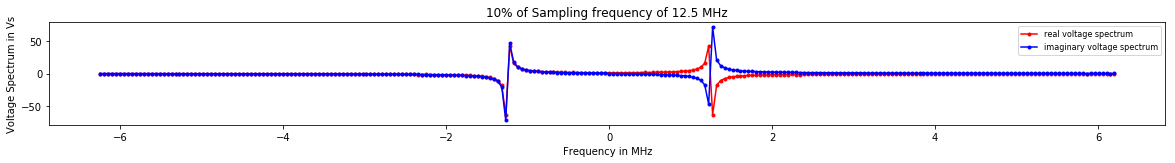

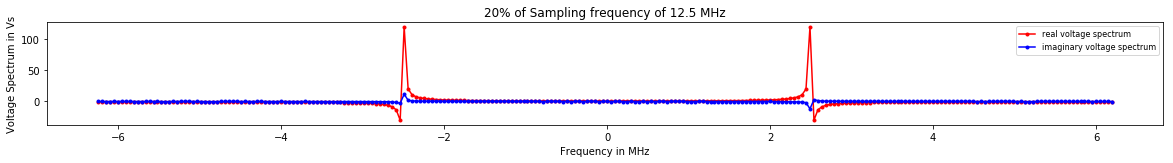

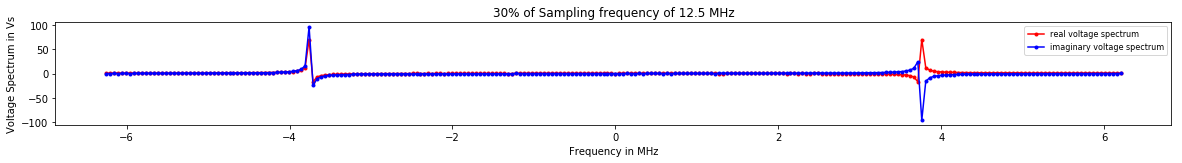

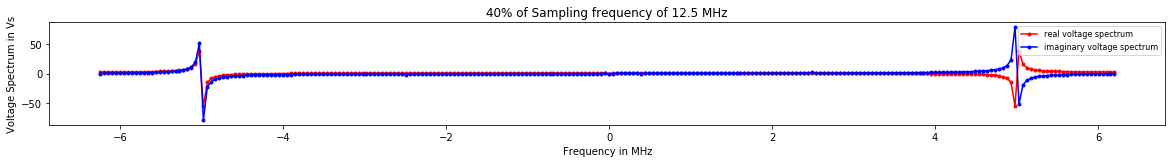

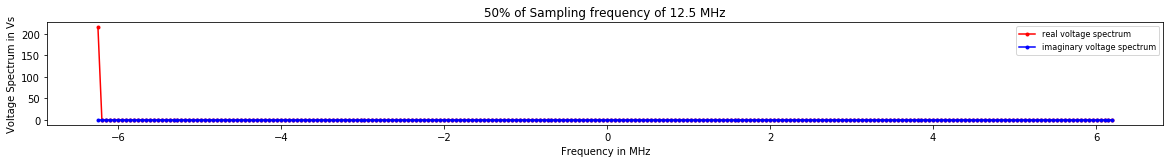

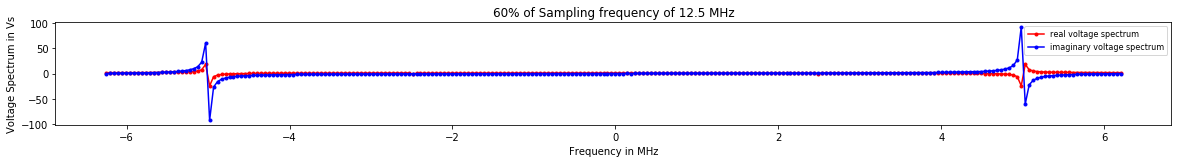

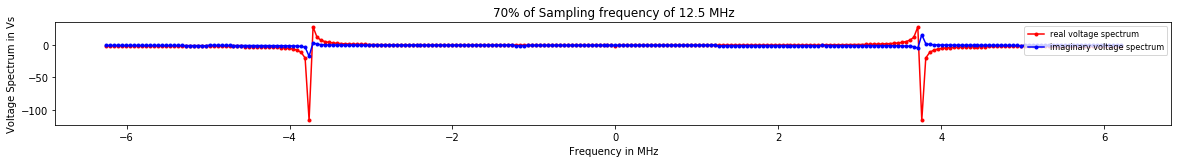

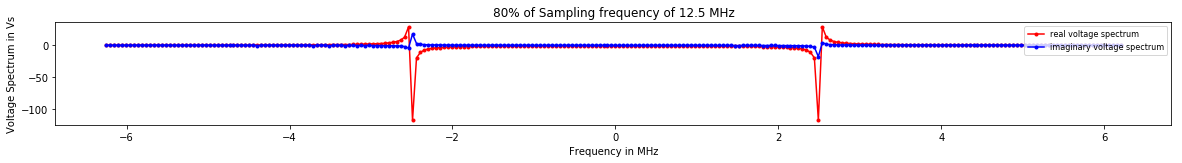

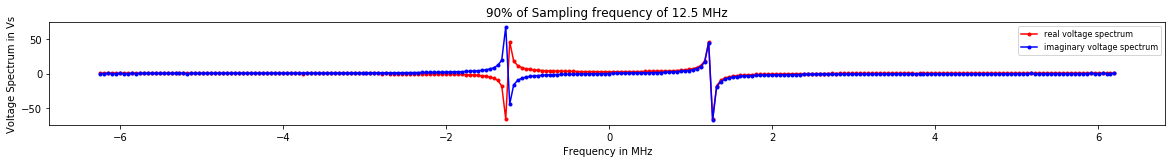

In [10]:
get_VS_plots(2**8)

In [11]:
##POWER SPECTRUM 

In [12]:
def power_spectra(N):
    PF = []
    v_samp = 12.5e6
    t = np.linspace(-N/(2*v_samp),((N/2)-1)/v_samp,N) #time sample domain signal 
    f = np.linspace(-v_samp/2,(1-2/N)*(v_samp/2),N)  #output sample frequency domain 
    for i in range(1,10):
        pf = []
        EF = dft(ARR[i-1][50:N+50]/2**13,t,f,vsamp=12.5e6)
        PF.append(pf)
        for comp in EF[1]:
            pf.append(np.abs(comp)**2)
    return PF


In [13]:
def get_PS_plots(N):
    v_samp = 12.5e6
    f = np.linspace(-v_samp/2,(1-2/N)*(v_samp/2),N)
    for i in range(1,10):
        plt.figure(figsize=(20,20))
        lit = 910 + i
        plt.subplot(lit)
        plt.plot(f/1e6,power_spectra(N)[i-1],'b.-')
        plt.xlabel("Frequency in (MHz)", fontsize= 20)
        plt.ylabel("Power", fontsize = 20)
        plt.title(str(i) + '0% of Sampling frequency of 12.5MHz')
        plt.show()
    

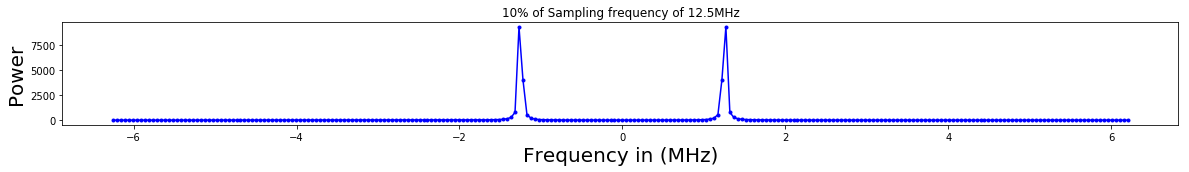

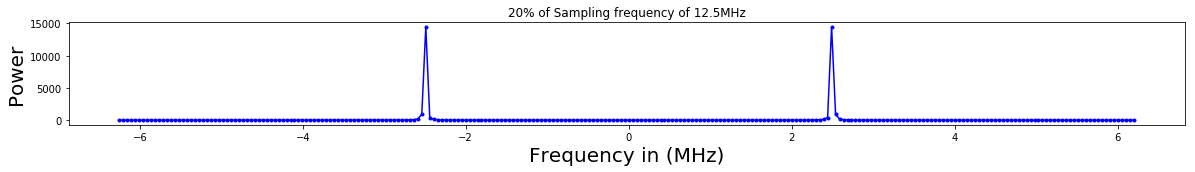

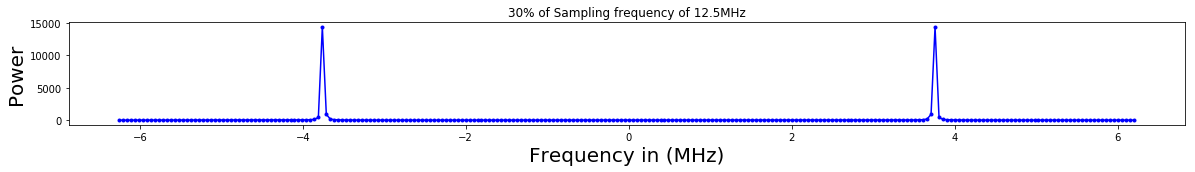

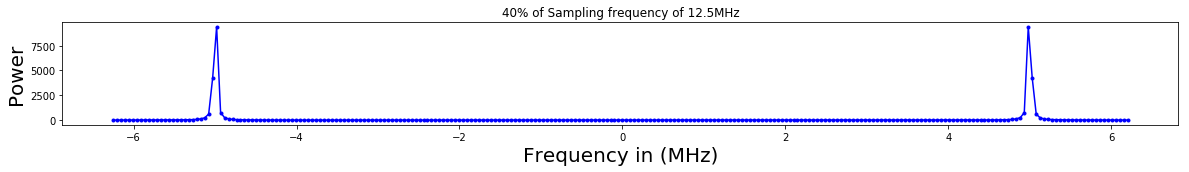

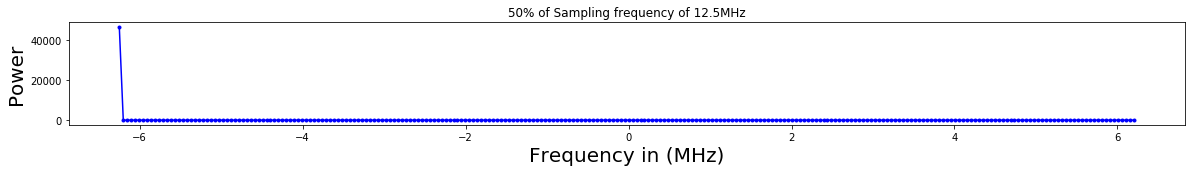

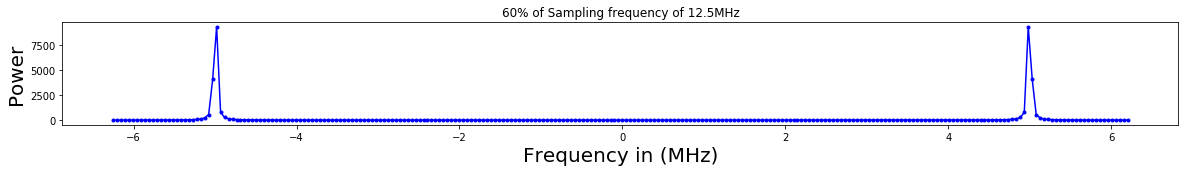

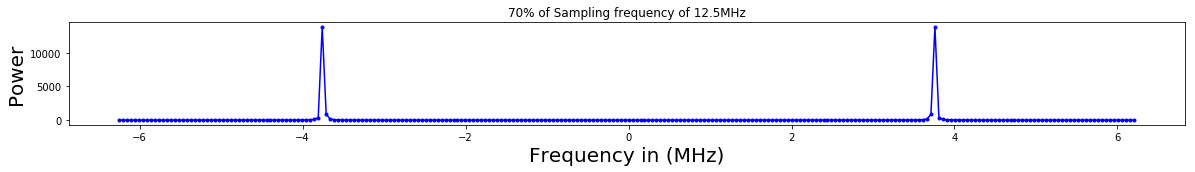

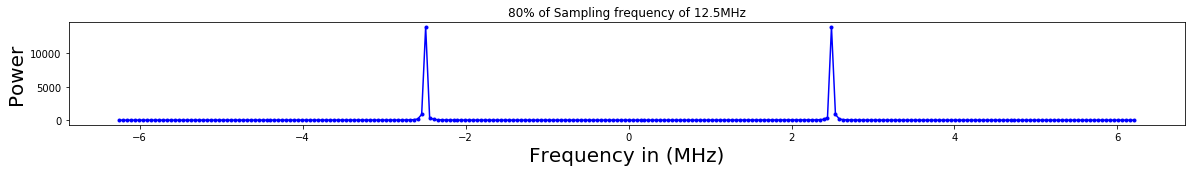

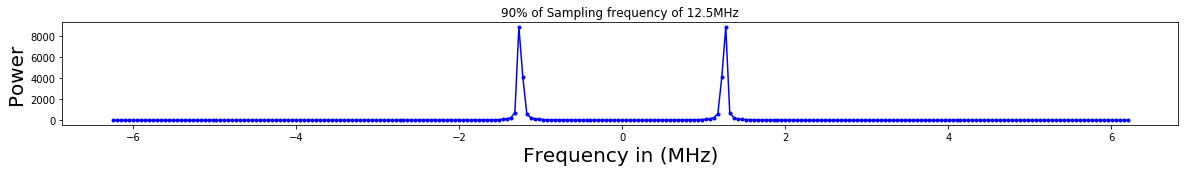

In [14]:
get_PS_plots(2**8)

In [15]:
##POWER LEAKAGE

In [16]:
def get_PS_plots_leaks(N):
    v_samp = 12.5e6
    f = np.linspace(-v_samp/2,(1-2/N)*(v_samp/2),N)
    for i in range(1,10):
        plt.figure(figsize=(20,20))
        lit = 910 + i
        plt.subplot(lit)
        plt.plot(f/1e6,power_spectra(N)[i-1],'r.-')
        plt.xlabel("Frequency in (MHz)", fontsize= 20)
        plt.ylabel("Power", fontsize = 20)
        plt.ylim(0,10)
        plt.title(str(i) + '0% of Sampling frequency of 12.5MHz')
        plt.show()
    

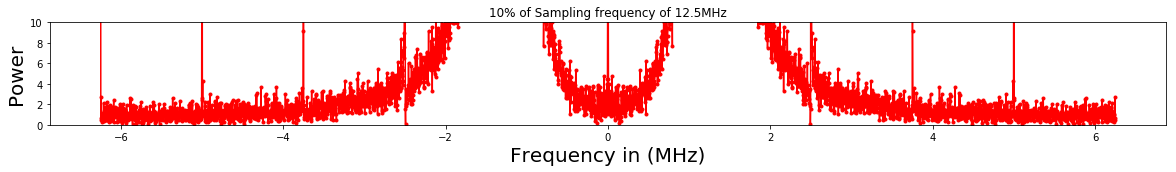

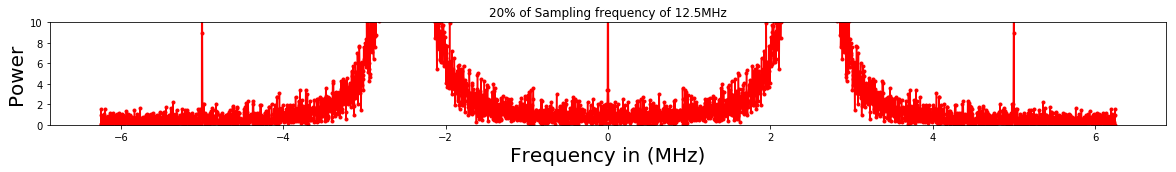

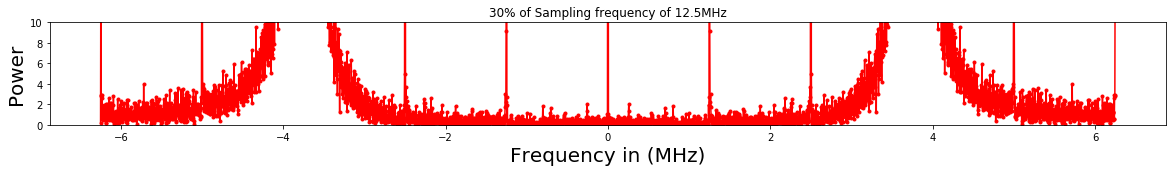

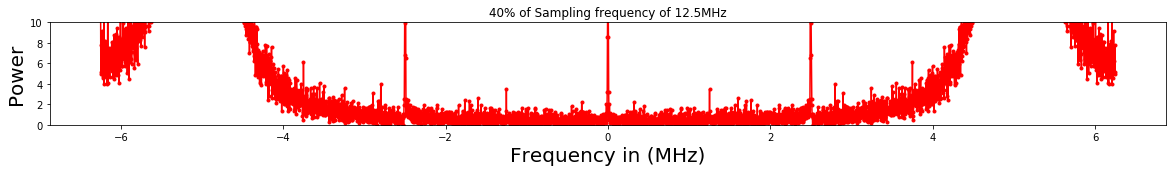

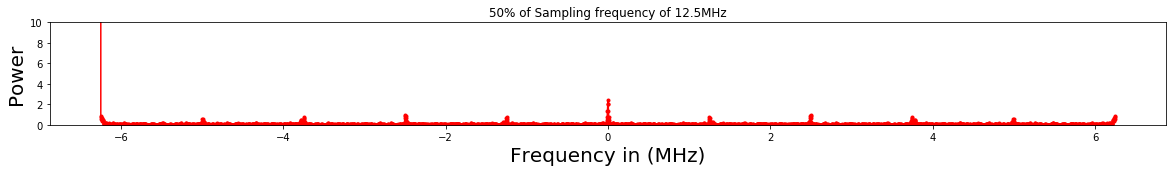

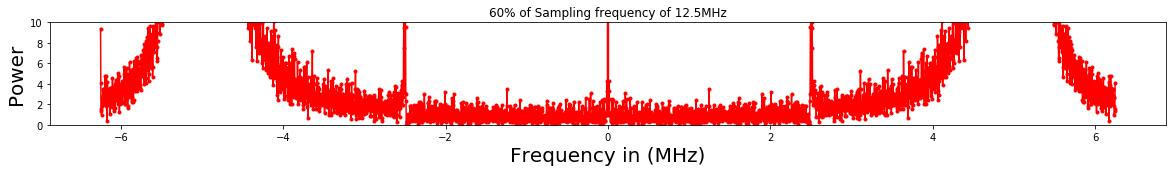

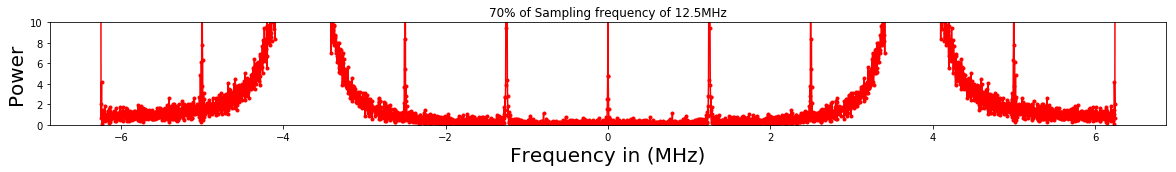

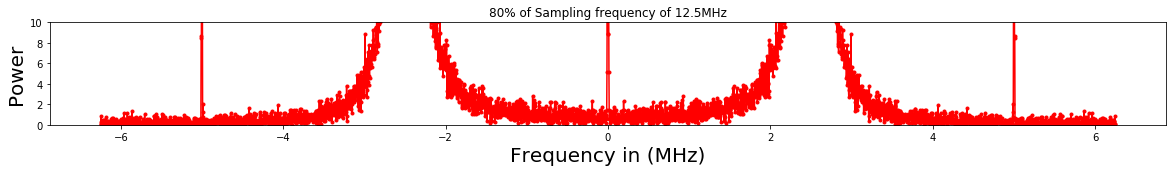

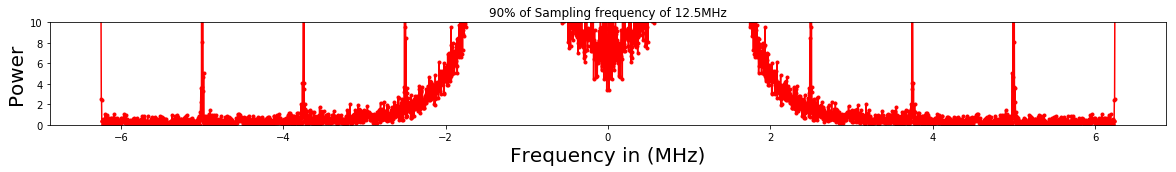

In [17]:
get_PS_plots_leaks(2**12)

In [18]:
##FREQUENCY RESOLUTION 

In [19]:
data = np.load('3.5data.npy')
data = data/2**15
N = 2**9


In [20]:
def power_spectra_resolution(N):
    PF = []
    v_samp = 12.5e6
    t = np.linspace(-N/(2*v_samp),((N/2)-1)/v_samp,N) #time sample domain signal 
    f = np.linspace(-v_samp/2,(1-2/N)*(v_samp/2),N)  #output sample frequency domain 
  
    EF = dft(data[0:N],t,f,vsamp=12.5e6)
    for comp in EF[1]:
        PF.append(np.abs(comp)**2)
    return PF

In [21]:
def get_PS_plots(N):
    v_samp = 12.5e6
    f = np.linspace(-v_samp/2,(1-2/N)*(v_samp/2),N)
    plt.figure(figsize=(20,20))
    plt.plot(f/1e6,power_spectra_resolution(N),'r.-')
    plt.xlabel("Frequency in (MHz)", fontsize= 20)
    plt.ylabel("Power", fontsize = 20)
    plt.show()
    

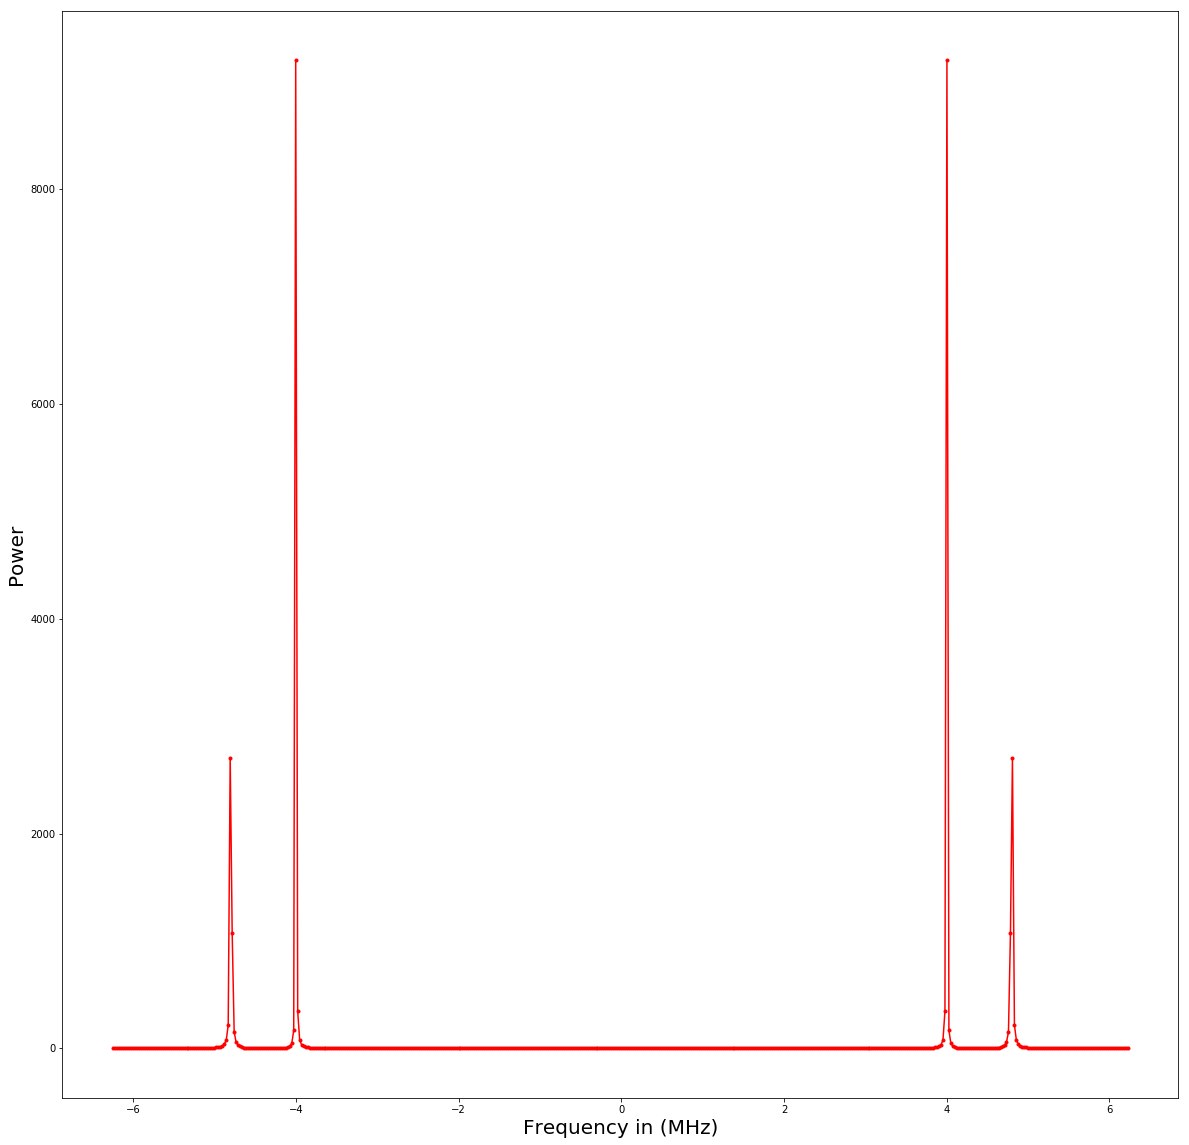

In [22]:
get_PS_plots(N)

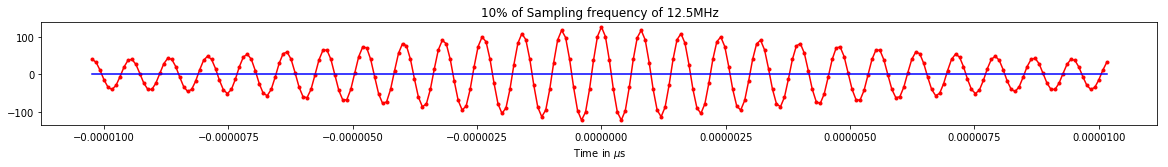

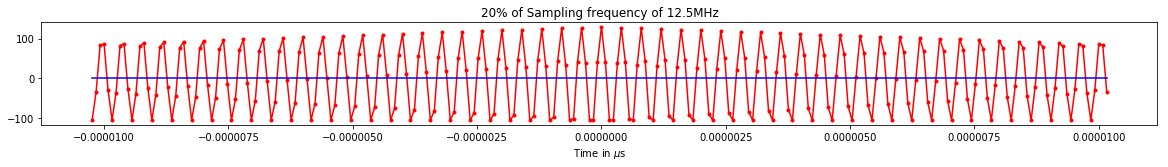

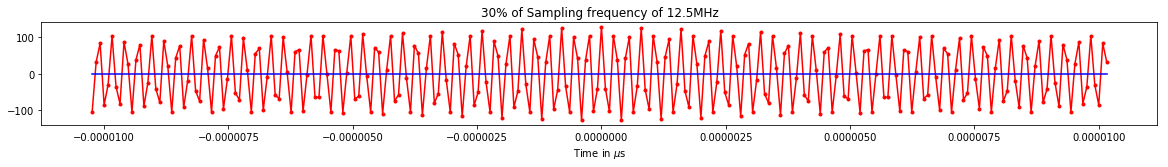

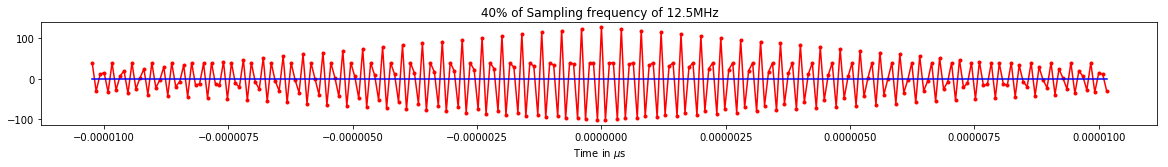

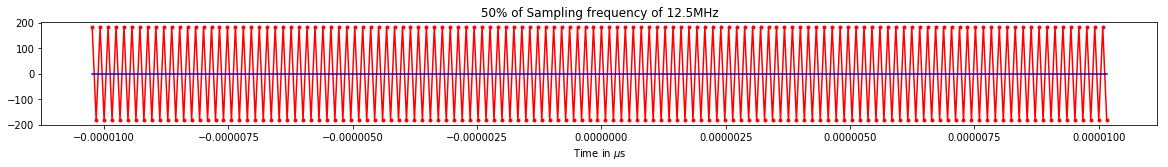

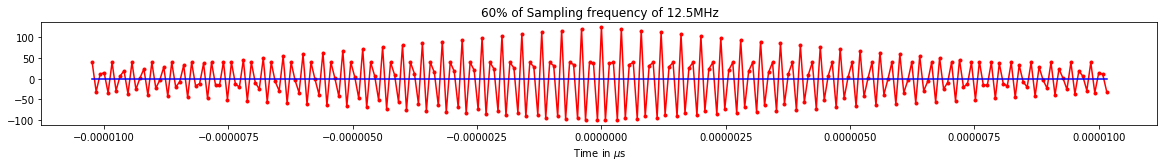

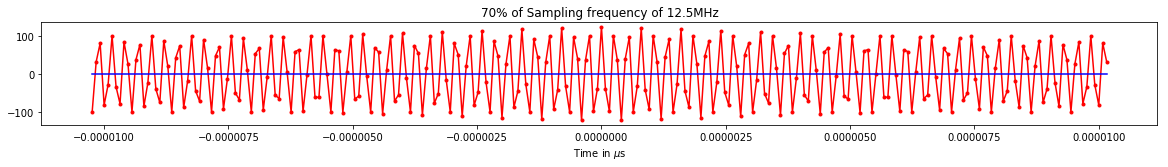

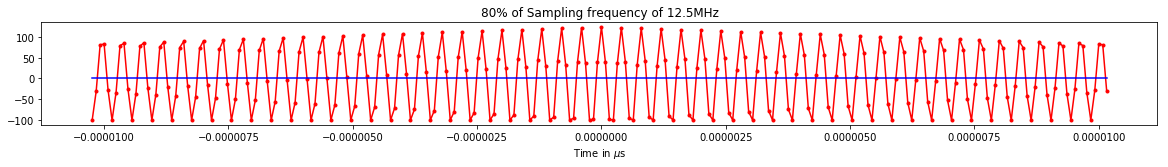

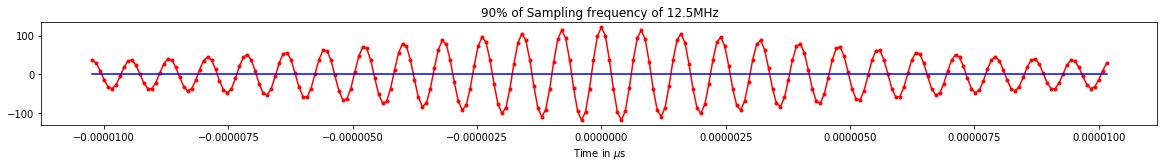

In [45]:
N = 2**8
v_samp = 12.5e6
t = np.linspace(-N/(2*v_samp),((N/2)-1)/v_samp,N)
f = np.linspace(-v_samp/2,(1-2/N)*(v_samp/2),N)
for i in range(1,10):
    FF = idft(power_spectra(N)[i-1],f,t,vsamp=12.5e6)
    REAL = []
    IMAG = []
    for num in FF[1]:
        REAL.append(num.real)
        IMAG.append(num.imag)
    plt.figure(figsize=(20,20))
    lit = 910 + i
    plt.subplot(lit)
    plt.plot(t,REAL,'r.-')
    plt.plot(t,IMAG,'b')
    plt.title(str(i) + '0% of Sampling frequency of 12.5MHz')
    plt.xlabel('Time in $\mu$s')
    plt.show()


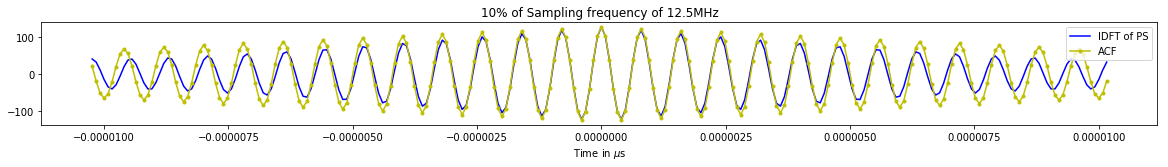

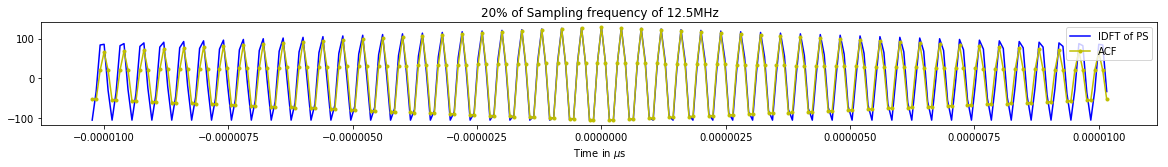

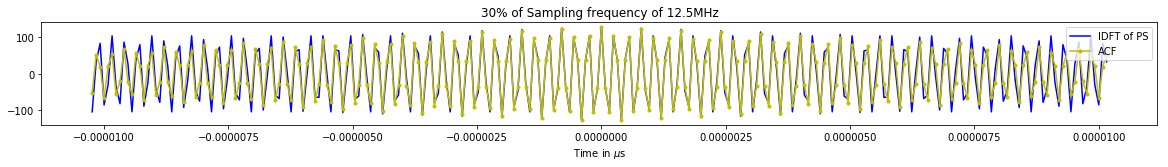

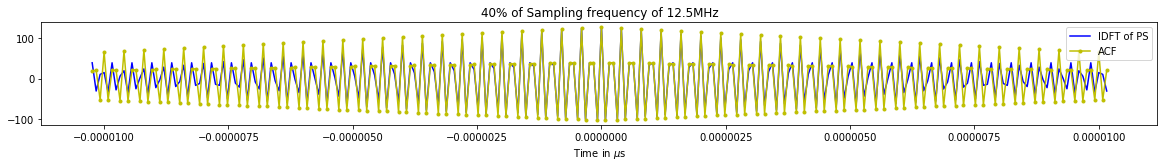

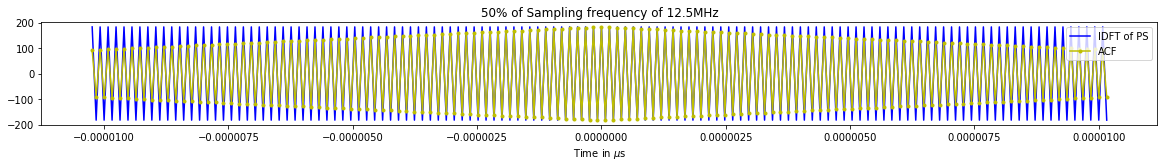

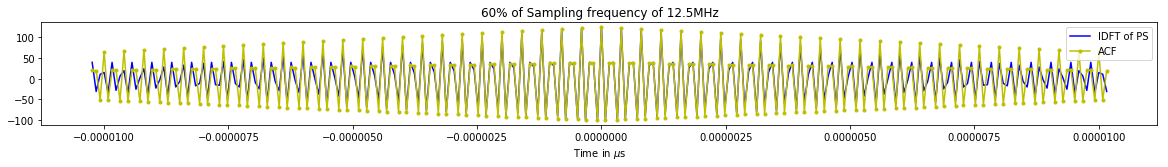

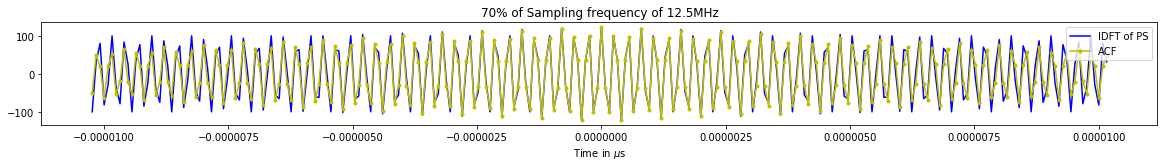

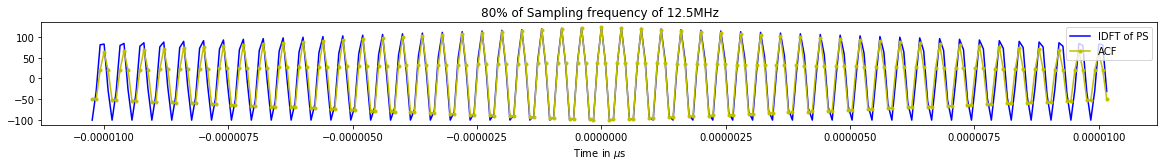

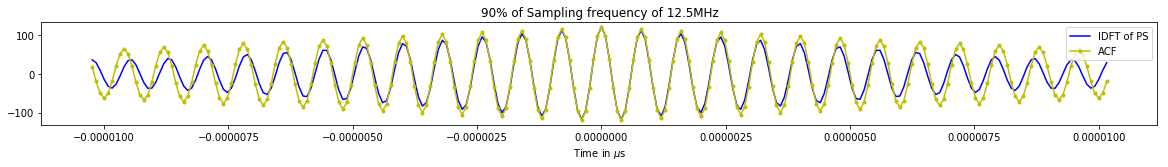

In [47]:

for i in range(1,10):
    x = ARR[i-1][50:50+N]/2**13
    ACF = np.correlate(x,x,'same')

    GG = idft(power_spectra(N)[i-1],f,t)
    yee = 910 +i 



    plt.figure(figsize=(20,20))
    plt.subplot(yee)
    plt.plot(t,GG[1].real,'b')
    plt.plot(t,ACF,'y.-')
    plt.title(str(i) + '0% of Sampling frequency of 12.5MHz')
    plt.xlabel('Time in $\mu$s')
    plt.legend(['IDFT of PS','ACF'],loc = 'upper right')
    plt.show()

In [25]:
##FTs pf NOISE

In [48]:
Arr = np.load('arr_0.npy')
arr = np.load('arr_1.npy')

In [49]:
###1

import matplotlib.pyplot as plt
import numpy as np
Arr = Arr/2**13
Vmean = np.mean(Arr)
print(Vmean)
Vmeansqr = np.mean([i**2 for i in Arr])
print(Vmeansqr)
Vrms = np.sqrt(Vmeansqr)
print(Vrms)



print(min(Arr))

0.03725
0.1003828125
0.31683246756
-1.3125


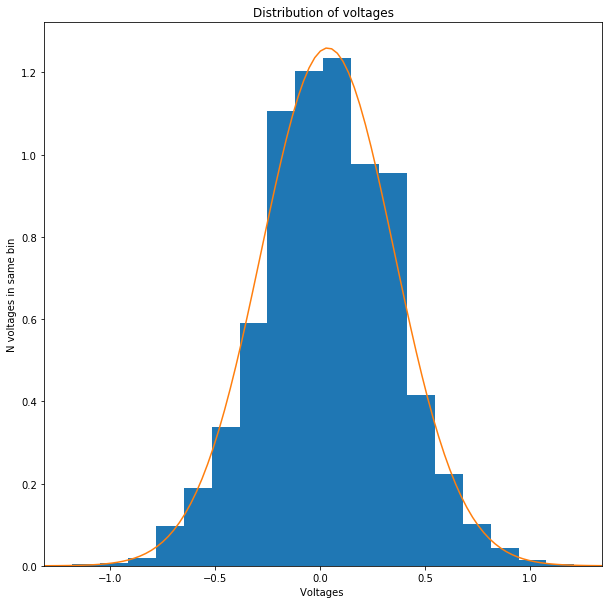

In [50]:
###2
from matplotlib.pyplot import mlab
import scipy as sp 
from scipy import stats 
from scipy.stats import norm



plt.figure(figsize=(10,10))
plt.hist(Arr,bins=20,normed=True)
plt.xlim((min(Arr), max(Arr)))


x = np.linspace(min(Arr),max(Arr),100)
plt.plot(x,mlab.normpdf(x,Vmean,Vrms))
plt.title('Distribution of voltages')
plt.xlabel('Voltages ')
plt.ylabel('N voltages in same bin')
plt.show()


In [29]:
###3
def power_spectra_block(n):
    N = 16000
    PF = []
    v_samp = 12.5e6
    t = np.linspace(-N/(2*v_samp),((N/2)-1)/v_samp,N) #time sample domain signal 
    f = np.linspace(-v_samp/2,(1-2/N)*(v_samp/2),N)  #output sample frequency domain 
    for i in range(1,n):
        pf = []
        EF = dft(arr[i-1]/2**13,t,f,vsamp=12.5e6)
        PF.append(pf)
        for comp in EF[1]:
            pf.append(np.abs(comp)**2)
    if n > 33:
        print("not a valid input")
    return np.array(PF)


In [42]:
def get_PS_plots_block(n):
    v_samp = 12.5e6
    N = 16000
    f = np.linspace(-v_samp/2,(1-2/N)*(v_samp/2),N)
    GG = [np.mean(i) for i in zip(*power_spectra_block(n))]

    plt.figure(figsize=(20,20))
       
    plt.plot(f/1e6,GG)
    plt.xlabel("Frequency in (MHz)", fontsize= 20)
    plt.ylabel("Power", fontsize = 20)
    plt.title('AVG of ' + str(n-1) + ' Blocks')
    plt.show()
    

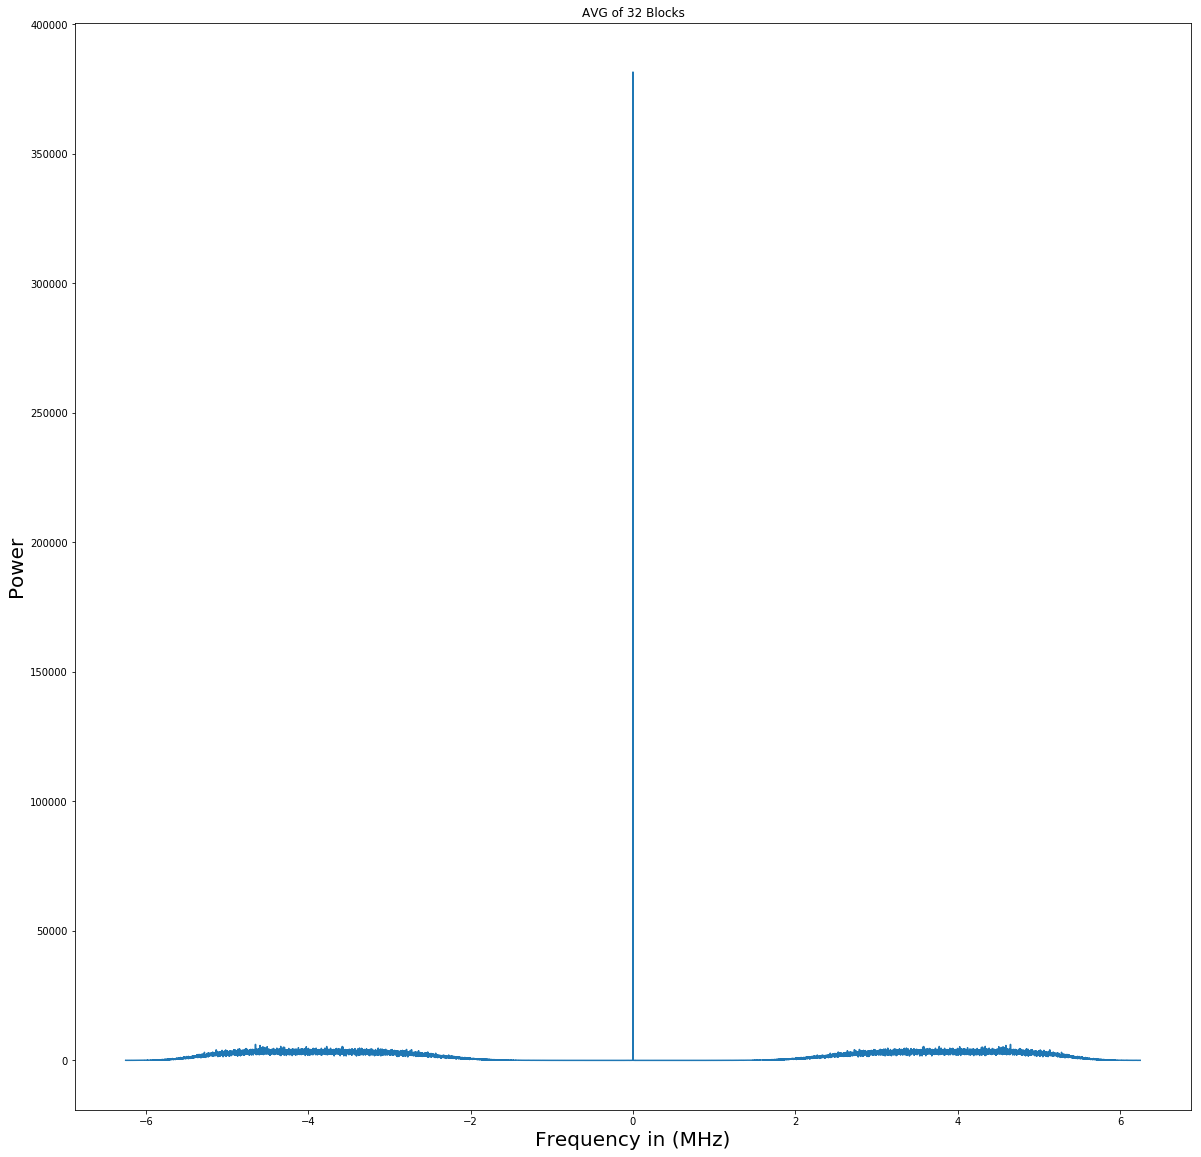

In [31]:
get_PS_plots_block(33)

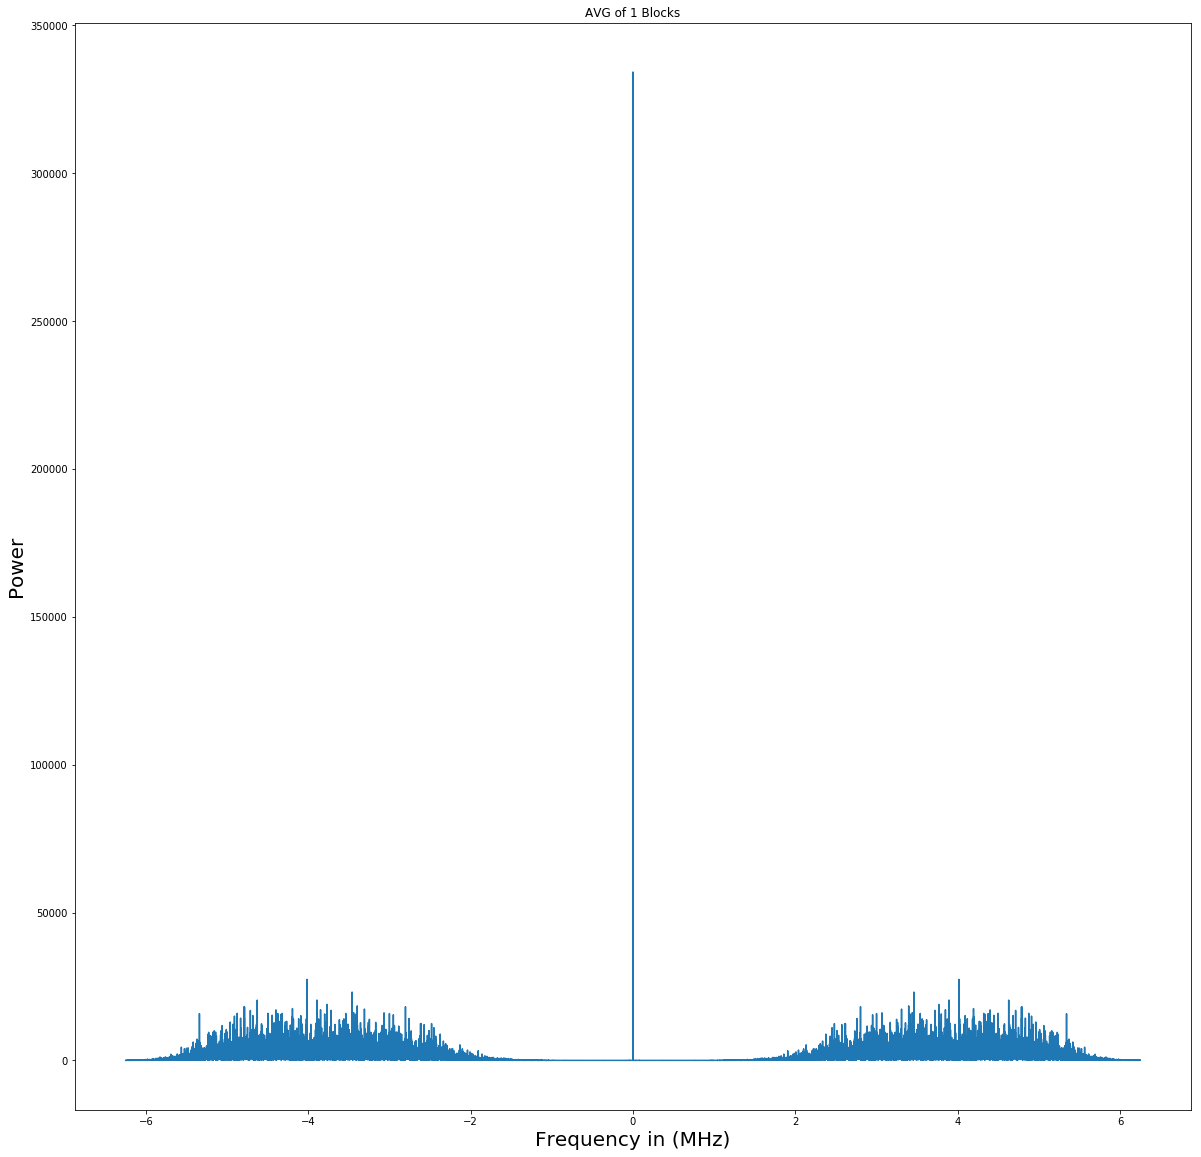

In [43]:
get_PS_plots_block(2)

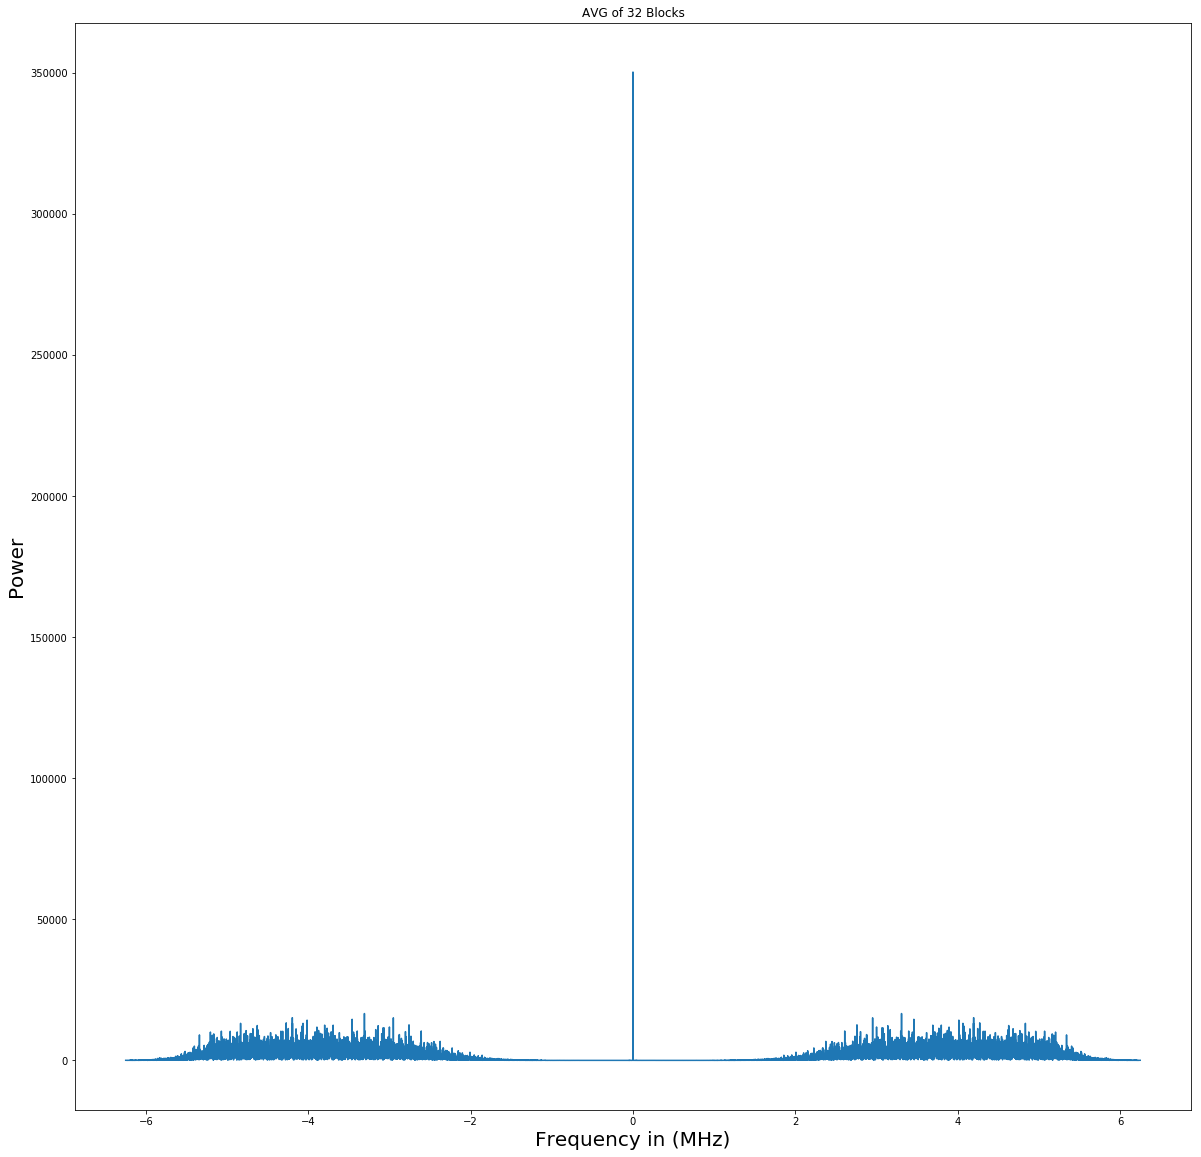

In [35]:
get_PS_plots_block(3)

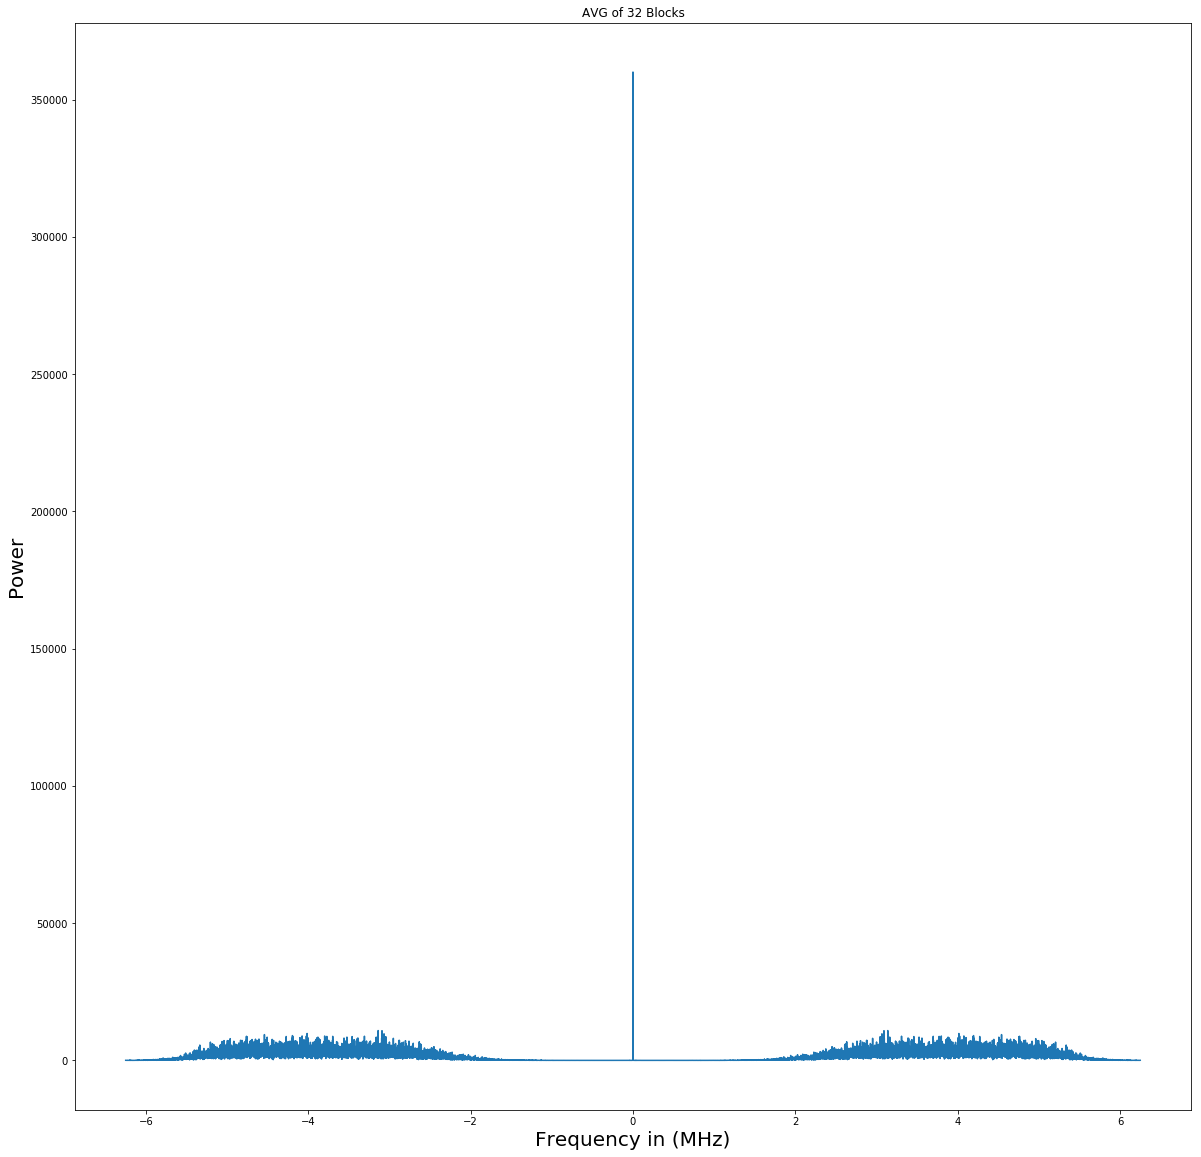

In [36]:
get_PS_plots_block(5)

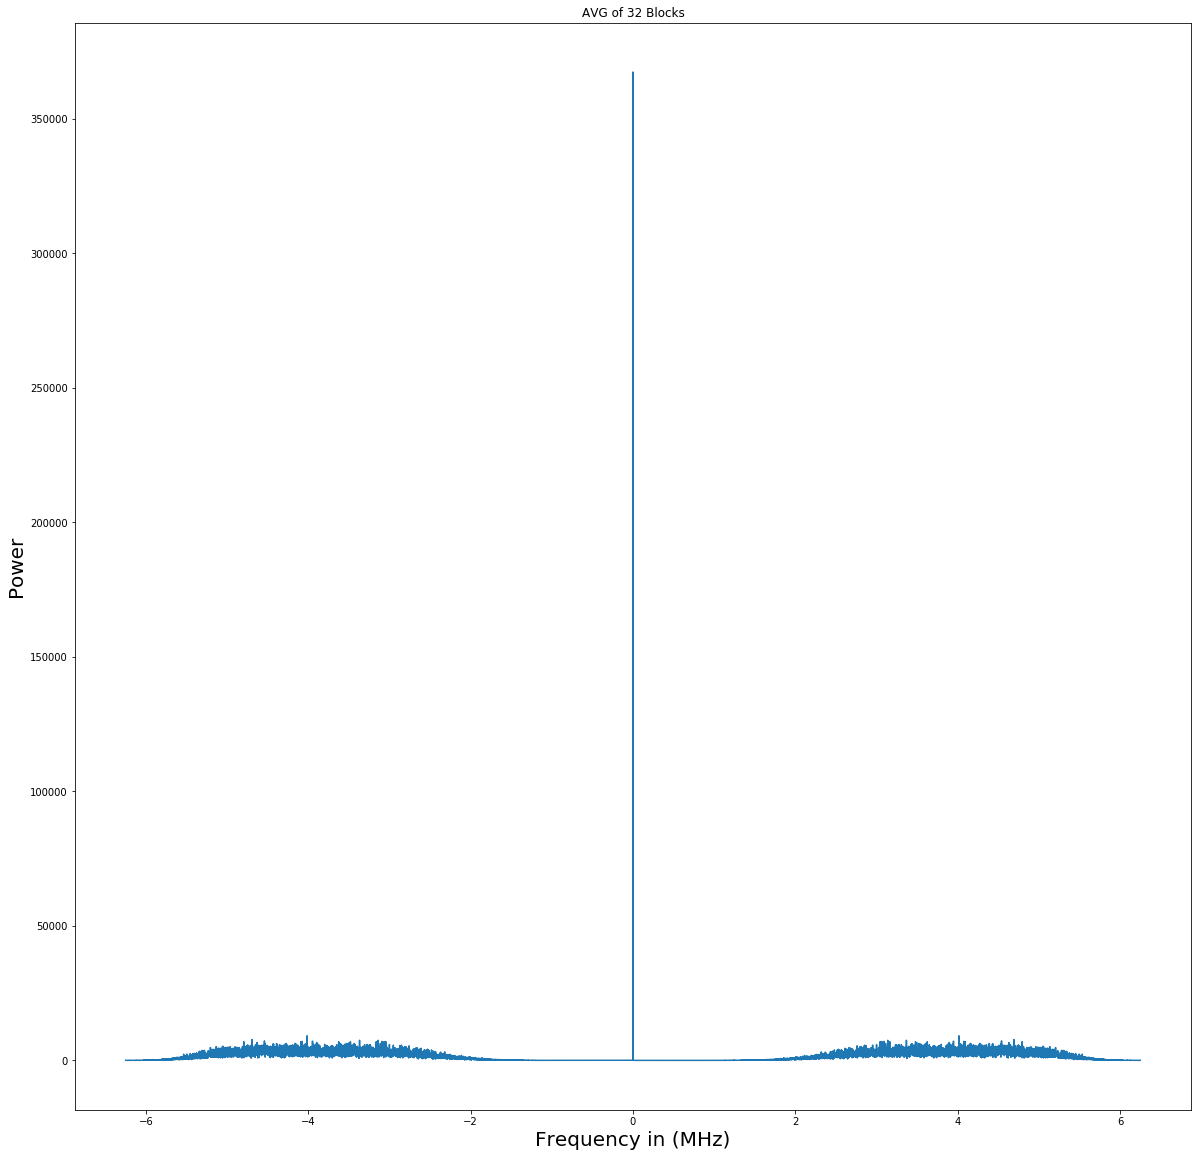

In [37]:
get_PS_plots_block(9)

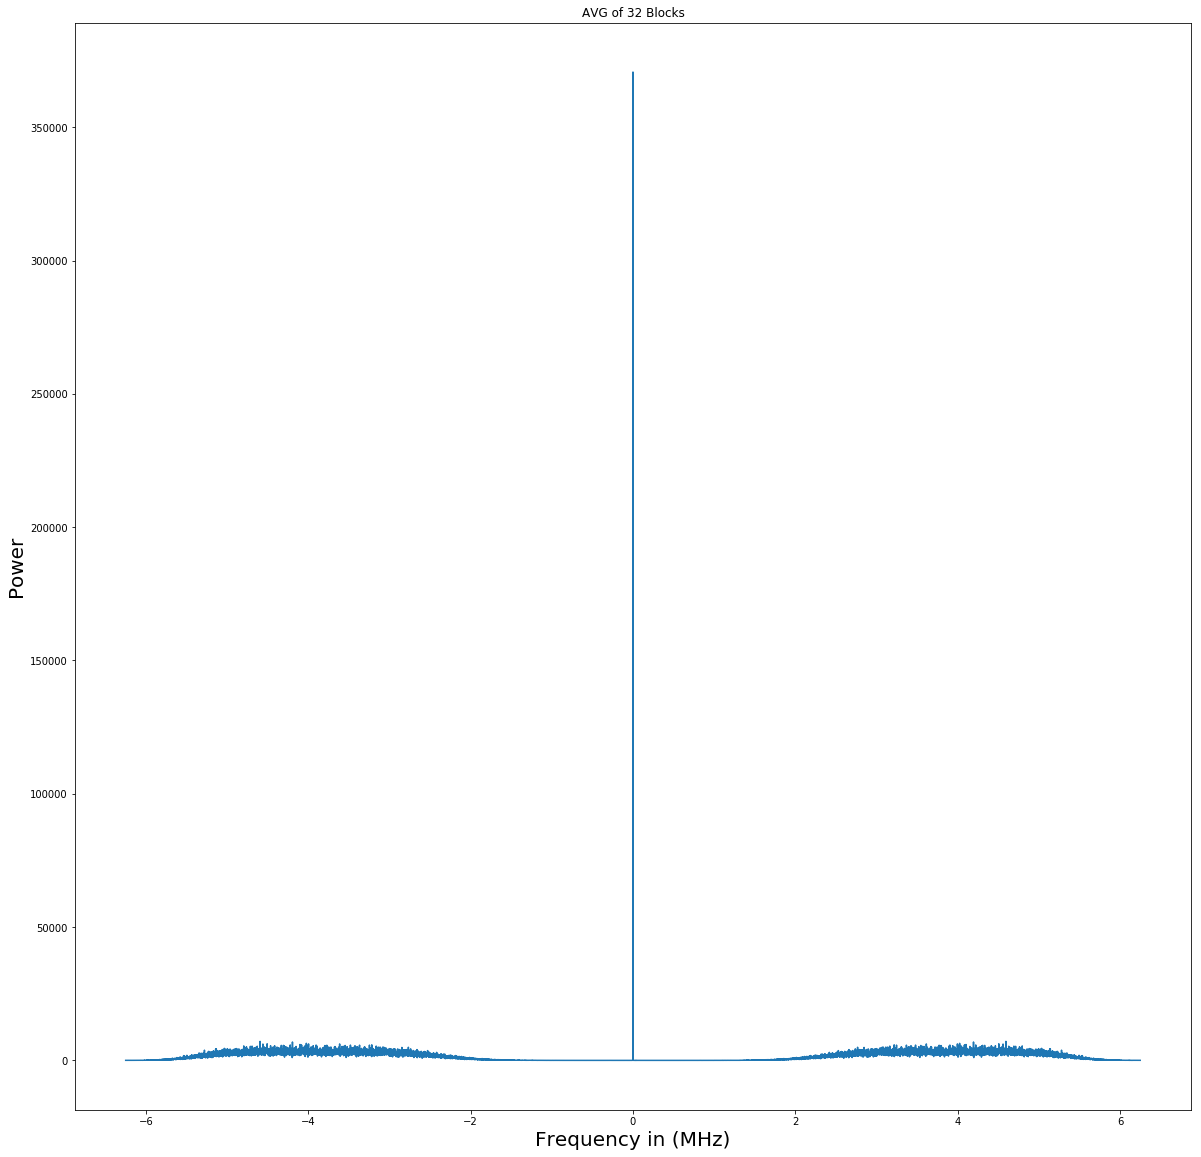

In [38]:
get_PS_plots_block(17)

In [31]:
def power_spectra_block(n):
    N = 16000
    PF = []
    v_samp = 12.5e6
    t = np.linspace(-N/(2*v_samp),((N/2)-1)/v_samp,N) #time sample domain signal 
    f = np.linspace(-v_samp/2,(1-2/N)*(v_samp/2),N)  #output sample frequency domain 
    for i in range(1,n):
        pf = []
        EF = dft(arr[i-1]/2**13,t,f,vsamp=12.5e6)
        PF.append(pf)
        for comp in EF[1]:
            pf.append(np.abs(comp)**2)
    if n > 33:
        print("not a valid input")
    return np.array(PF)

In [32]:
acf = np.correlate(arr[0],arr[0],mode='same')
N = 16000
acf = acf/N
t = np.linspace(-N/(2*v_samp),((N/2)-1)/v_samp,N) #time sample domain signal 
f = np.linspace(-v_samp/2,(1-2/N)*(v_samp/2),N) 
#gg = dft(acf,t,f)
#plt.figure(figsize=(20,20))
#plt.plot(f/1e6,gg[1].real,'r.-')
#plt.plot(f/1e6,gg[1].imag)
#plt.plot(f/1e6,power_spectra_block(2)[0],'b')
#plt.show()
len(acf)

16000

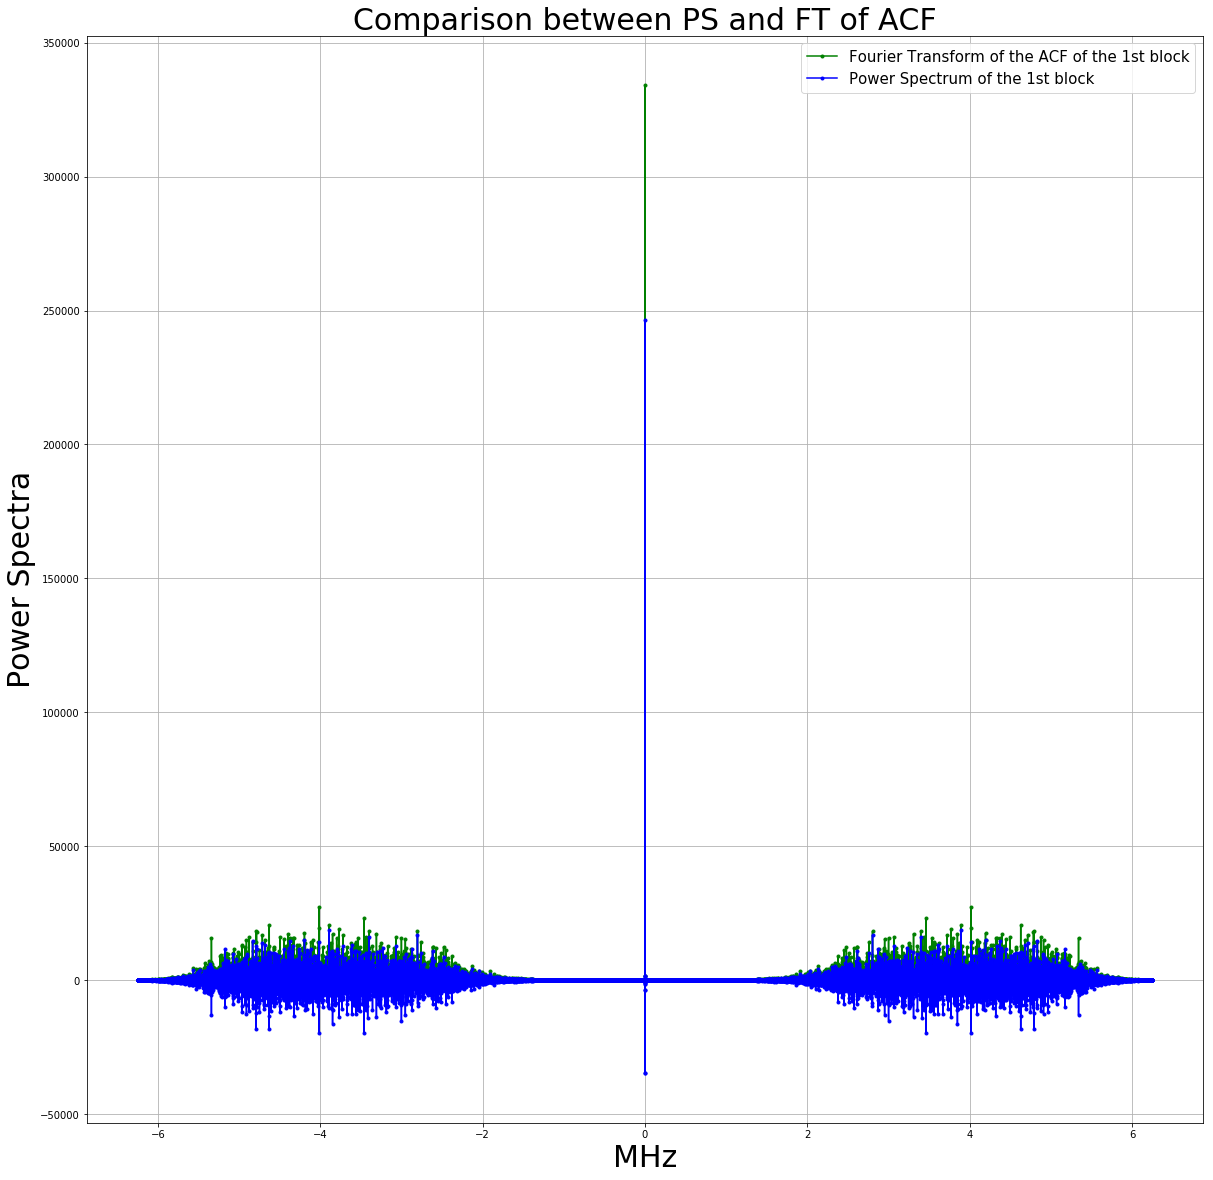

In [41]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


x = arr[0]/2**13
acf = np.correlate(x, x, mode='same')
yee = dft(acf,t,f)
# plot ACF
fig = plt.figure(figsize = (20, 20))

#plt.stem(kappa, acf)
plt.plot(f/1e6,power_spectra_block(2)[0],'g.-')

plt.plot(f/1e6,yee[1].real,'b.-')
plt.xlabel('MHz',fontsize = 30)
plt.ylabel('Power Spectra',fontsize=30)
plt.legend(['Fourier Transform of the ACF of the 1st block','Power Spectrum of the 1st block'],loc='upper right',fontsize=15)
plt.title('Comparison between PS and FT of ACF',fontsize=30)
plt.grid()
